In [1]:
#%%imports
from datetime import datetime
import importlib
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import sys

sys.path.append("../../")
from src_py.plots import gantt

importlib.reload(gantt)


<module 'src_py.plots.gantt' from '/home/lukas/github/code_snippets/src_py_demos/plots/../../src_py/plots/gantt.py'>

## `plo_gantt()`

task,start,end,category,#,duration
str,datetime[μs],datetime[μs],str,i64,duration[μs]
"""Task3""",2025-02-01 00:00:00,2026-01-13 00:00:00,"""Category3""",0,346d
"""Task2""",2025-09-15 00:00:00,2025-11-01 00:00:00,"""Category3""",1,47d
"""Task1""",2025-08-01 00:00:00,2025-08-15 00:00:00,"""Category3""",2,14d
"""Task3""",2025-07-01 00:00:00,2026-01-01 00:00:00,"""Category2""",3,184d
"""Task2""",2025-07-01 00:00:00,2025-09-01 00:00:00,"""Category2""",4,62d
"""Task1""",2025-04-01 00:00:00,2025-08-01 00:00:00,"""Category2""",5,122d
"""Task2""",2025-02-01 00:00:00,2025-05-01 00:00:00,"""Category1""",6,89d
"""Task1""",2025-01-20 00:00:00,2025-04-01 00:00:00,"""Category1""",7,71d


/tmp/ipykernel_195238/1804111196.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="left")


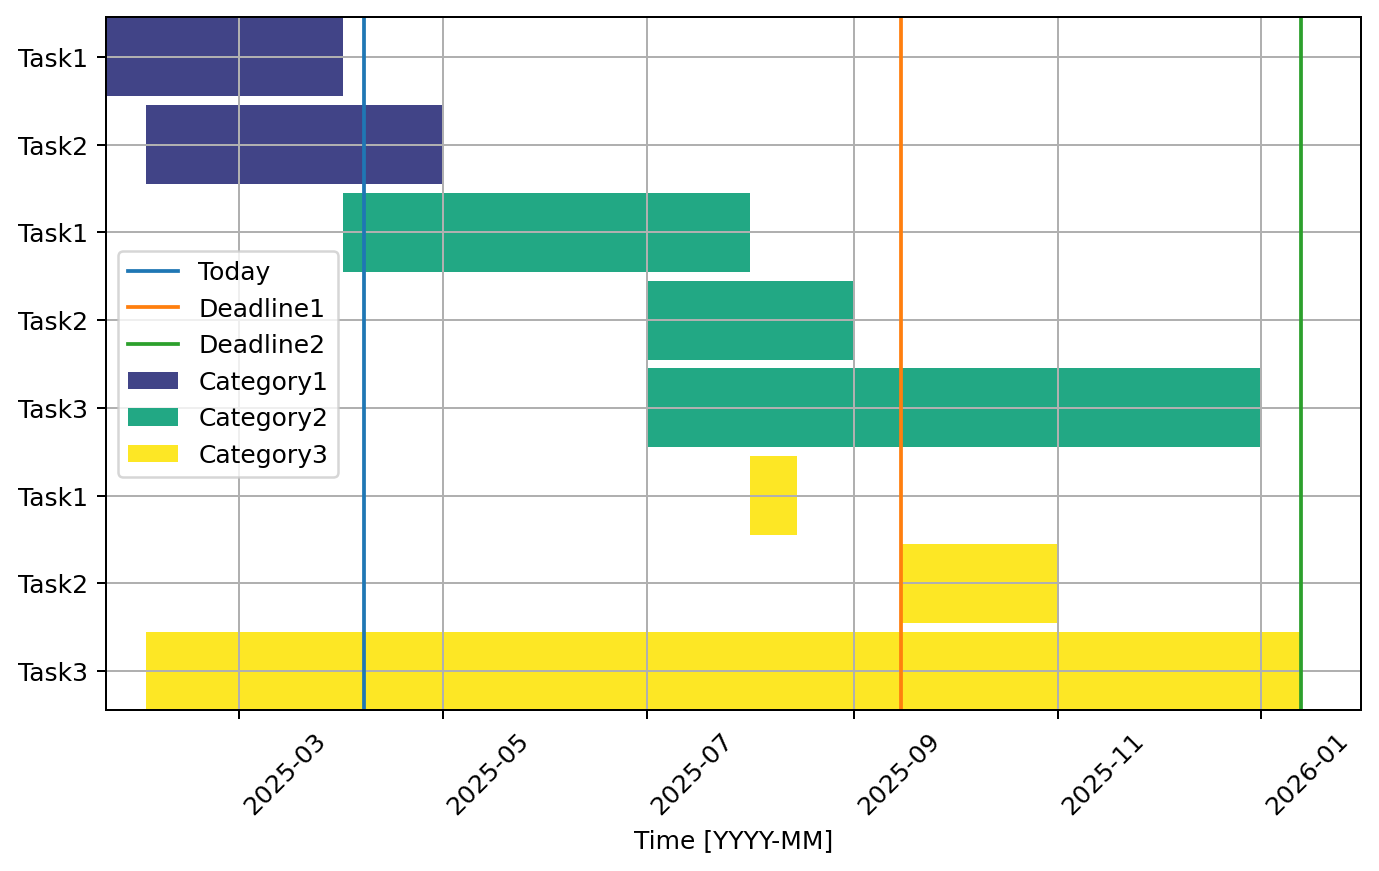

In [4]:
#some schedule
df = pl.from_dicts([
    dict(task="Task1",  start="2025-01-20", end="2025-04-01", category="Category1"),
    dict(task="Task2",  start="2025-02-01", end="2025-05-01", category="Category1"),
    dict(task="Task1",  start="2025-04-01", end="2025-08-01", category="Category2"),
    dict(task="Task2",  start="2025-07-01", end="2025-09-01", category="Category2"),
    dict(task="Task3",  start="2025-07-01", end="2026-01-01", category="Category2"),
    dict(task="Task1",  start="2025-08-01", end="2025-08-15", category="Category3"),
    dict(task="Task2",  start="2025-09-15", end="2025-11-01", category="Category3"),
    dict(task="Task3",  start="2025-02-01", end="2026-01-13", category="Category3"),
][::-1])


df = df.with_columns([
    pl.lit(np.arange(df.shape[0])).alias("#"),
    pl.col("start").str.strptime(pl.Datetime),
    pl.col("end").str.strptime(pl.Datetime),
])
df = df.with_columns([
    (pl.col("end")-pl.col("start")).alias("duration"),
])
display(df)

#plotting
fig = plt.figure(figsize=(9,5), dpi=180)
ax = fig.add_subplot(111)

ax = gantt.plot_gantt(df, ax=ax, vmin=0.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="left")
# ax.tick_params("x", rotation=45, ha="left")

ax.axvline(datetime.now(),                              c="C0", label="Today")
ax.axvline(datetime.strptime("2025-09-15", "%Y-%m-%d"), c="C1", label="Deadline1")
ax.axvline(datetime.strptime("2026-01-13", "%Y-%m-%d"), c="C2", label="Deadline2")
ax.legend()
plt.show()
